### Imports

In [235]:
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,4,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('LeagueIndex').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select Style
#plt.style.use('fivethirtyeight')

In [2]:
sc2 = pd.read_csv('./starcraft.csv')
sc2.isnull().sum().sum()
sc2 = sc2.dropna()

### SC2 Graphs

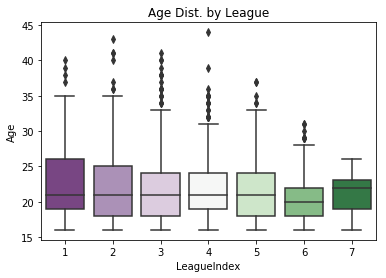

In [5]:
ax = sns.boxplot(x = 'LeagueIndex', y = 'Age', data=sc2, showfliers=True, palette="PRGn")
ax.set_title('Age Dist. by League');

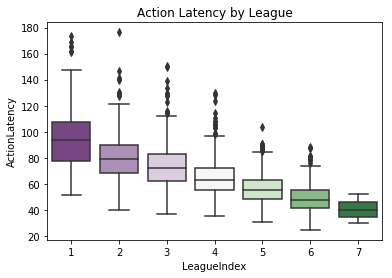

In [6]:
ax = sns.boxplot(x="LeagueIndex", y="ActionLatency", data=sc2, palette="PRGn")
ax.set_title('Action Latency by League');

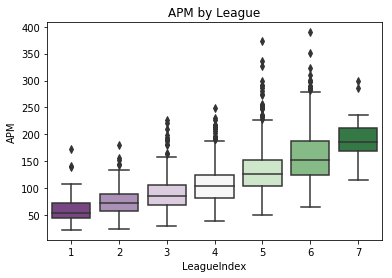

In [7]:
ax = sns.boxplot(x="LeagueIndex", y="APM", data=sc2, palette="PRGn")
ax.set_title('APM by League');

In [8]:
sc2 = sc2[sc2.TotalHours<4000]

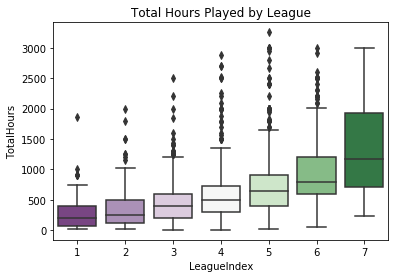

In [9]:
ax = sns.boxplot(x="LeagueIndex", y="TotalHours", data=sc2, palette="PRGn")
ax.set_title('Total Hours Played by League');

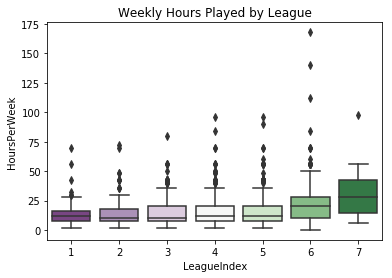

In [10]:
ax = sns.boxplot(x="LeagueIndex", y="HoursPerWeek", data=sc2, palette="PRGn")
ax.set_title('Weekly Hours Played by League');

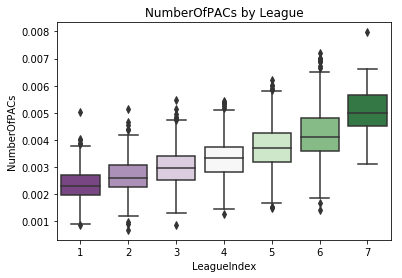

In [16]:
ax = sns.boxplot(x="LeagueIndex", y="NumberOfPACs", data=sc2, palette="PRGn")
ax.set_title('NumberOfPACs by League');



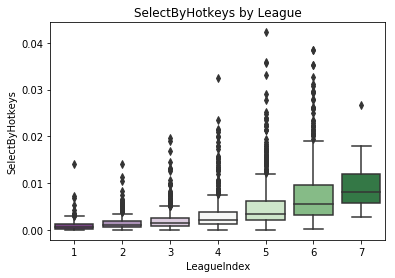

In [17]:
ax = sns.boxplot(x="LeagueIndex", y="SelectByHotkeys", data=sc2, palette="PRGn")
ax.set_title('SelectByHotkeys by League');

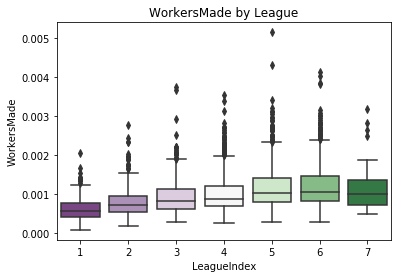

In [13]:
ax = sns.boxplot(x=sc2["LeagueIndex"], y=sc2["WorkersMade"], palette="PRGn", linewidth=1.5)
ax.set_title('WorkersMade by League');

### Correlation

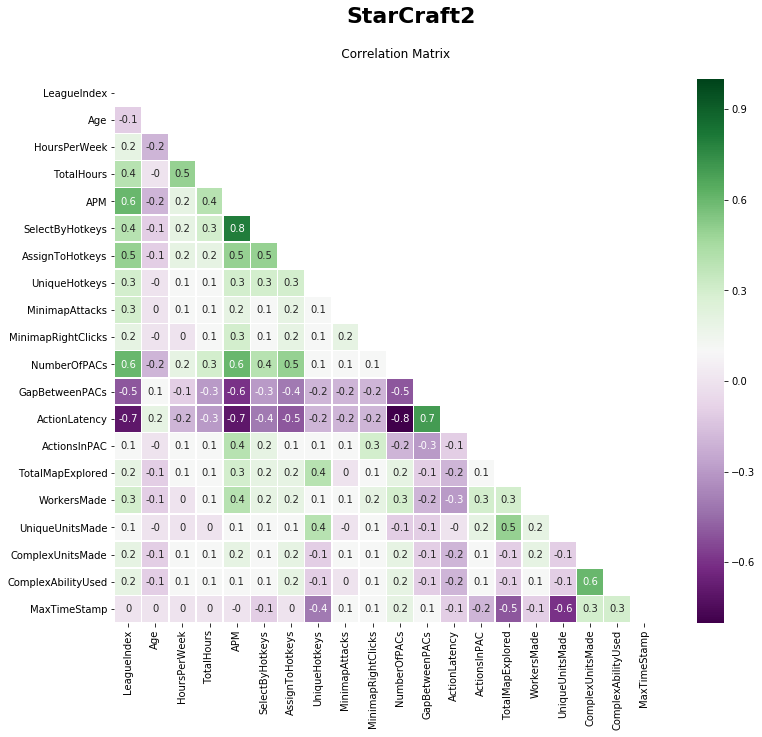

In [14]:
# Copy all df columns to new df, excluding GameID for easy matrix reading
c_matrix_df = sc2.drop('GameID',axis=1)

# Create figure
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (14,10))
fig.suptitle('StarCraft2', fontsize=22, fontweight='bold')

# Generate a mask to hide the upper triangle for a cleaner heatmap.  Less visual noise the better.
mask = np.zeros_like(c_matrix_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create correlation matrix heatma[]
r_matrix = c_matrix_df.corr().round(decimals=1)
sns.heatmap(r_matrix, mask=mask, square=True, cmap="PRGn", linewidths=.5, annot=True, fmt='g', 
            annot_kws={'size':10})
axes.set_title('     Correlation Matrix\n')
plt.show()

In [ ]:
#Here we want to pull out what the correlation matrix dictates are the more important for League Rank

In [228]:
Important_Features = r_matrix[(r_matrix['LeagueIndex']>=0.5) | (r_matrix['LeagueIndex']<=-0.5)].LeagueIndex
Important_Features = Important_Features.drop('LeagueIndex')
Important_Features

APM                0.6
AssignToHotkeys    0.5
NumberOfPACs       0.6
GapBetweenPACs    -0.5
ActionLatency     -0.7
Name: LeagueIndex, dtype: float64

In [229]:
ss = MinMaxScaler()

In [231]:
League_means = sc2.groupby('LeagueIndex').mean().drop("GameID",axis=1)
League_means_scaled = ss.fit_transform(League_means)
League_means_scaled = pd.DataFrame(League_means_scaled,columns=League_means.columns, index=League_means.index)

In [233]:
#Average States By League Rank
League_means

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,22.724551,13.125749,264.191617,59.539277,0.001081,0.000185,0.000045,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,0.000251,0.000626,0.000079,0.000015,0.000042,80558.586826
2,22.155620,13.296830,331.409222,74.780917,0.001536,0.000222,0.000045,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,0.000257,0.000801,0.000080,0.000024,0.000076,84271.573487
3,22.063636,13.923636,456.012727,89.857653,0.002192,0.000282,0.000049,0.000056,0.000331,0.002975,46.161211,73.735615,5.156399,0.000259,0.000917,0.000082,0.000044,0.000113,84174.189091
4,21.985167,14.009889,562.265760,105.680629,0.003128,0.000340,0.000053,0.000075,0.000368,0.003308,41.029132,64.824108,5.238048,0.000277,0.001006,0.000084,0.000065,0.000138,84619.960445
5,21.376412,16.148055,727.343789,131.299471,0.004947,0.000414,0.000064,0.000113,0.000427,0.003739,34.709563,56.152462,5.474388,0.000296,0.001167,0.000087,0.000076,0.000176,82272.506901
6,20.682334,21.121556,933.225284,158.282668,0.007373,0.000512,0.000074,0.000155,0.000472,0.004232,30.245788,48.958110,5.471698,0.000310,0.001213,0.000088,0.000078,0.000182,83878.405186
7,21.294118,31.411765,1333.411765,188.877847,0.009429,0.000725,0.000080,0.000316,0.000550,0.005116,22.930115,40.301015,5.185374,0.000309,0.001208,0.000079,0.000080,0.000268,96630.000000


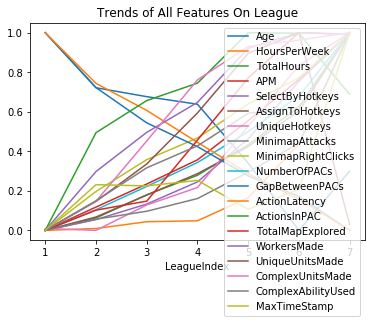

In [170]:
League_means_scaled.plot()
plt.title('Trends of All Features On League');

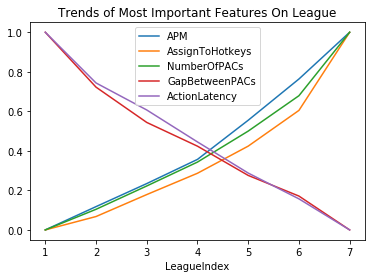

In [177]:
League_means_scaled[Important_Features.index].plot()
plt.title('Trends of Most Important Features On League');

In [180]:
League_means_scaled[Important_Features.index]

,APM,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
LeagueIndex,,,,,
1,0.000000,0.000000,0.000000,1.000000,1.000000
2,0.117843,0.067686,0.104283,0.722267,0.743486
3,0.234411,0.178804,0.222291,0.543737,0.606755
4,0.356749,0.286644,0.343222,0.423618,0.445033
5,0.554824,0.423904,0.499907,0.275705,0.287664
6,0.763449,0.604580,0.678891,0.171227,0.157105
7,1.000000,1.000000,1.000000,0.000000,0.000000


In [234]:
df = League_means_scaled[Important_Features.index].reset_index()
df.LeagueIndex = df.LeagueIndex.astype(str)

In [237]:
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(4,4,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('LeagueIndex').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

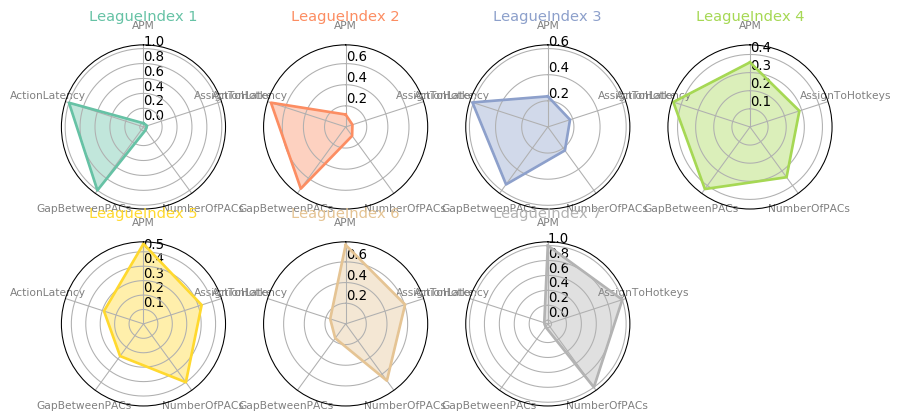

In [238]:
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title='LeagueIndex '+df['LeagueIndex'][row], color=my_palette(row))